In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

plt.rc('font', family='Malgun Gothic')  # 맑은 고딕 폰트 설정
plt.rc('axes', unicode_minus=False)     # 마이너스 기호 깨짐 방지
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE

import matplotlib.font_manager as fm

# 한글 폰트 설정
# matplotlib에서 폰트 설정을 하지 않고 한글 사용
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우에서는 기본 한글 폰트로 설정 (맑은 고딕)
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

### 데이터 구성

학력 데이터

In [2]:
# # 학력 정보
# education_data = {
#     '고등학교': ['서울고등학교'],
#     '대학교': {'학교명': '서울대학교', '학과': '컴퓨터공학과'},
#     '대학원': {'학교명': '카이스트', '학과': 'AI연구'}
# }

자격증 데이터

In [3]:
# # 자격증 정보 (자격증명, 취득 시점)
# certifications = {
#     '정보처리기사': '2020-03-15',
#     '데이터 분석 전문가': '2021-05-12'
# }

인턴십 데이터

In [4]:
# # 인턴십 정보 (회사명, 산업군, 직무명, 기간, 수행 작업)
# internships = [
#     {'회사명': '네이버', '산업군': 'IT', '직무명': '백엔드 개발', '기간': '2020-07-01 ~ 2020-12-31', '역할': 'API 개발 및 유지보수'},
#     {'회사명': '삼성전자', '산업군': '전자', '직무명': '데이터 분석', '기간': '2021-01-01 ~ 2021-06-30', '역할': '데이터 시각화 및 보고서 작성'}
# ]

어학 점수 데이터

In [5]:
# # 어학 점수 (시험명, 점수, 시험 시점)
# language_scores = {
#     'TOEIC': {'점수': 930, '시험 시점': '2019-06-10'},
#     'OPIc': {'점수': 'IH', '시험 시점': '2020-09-12'}
# }


개인 활동

In [6]:
# # 개인 프로젝트 (공식 X)와 공모전 정보
# personal_activities = {
#     '프로젝트': [
#         {'프로젝트명': '개인 웹사이트 개발', '사용한 스킬': ['HTML', 'CSS', 'JavaScript']},
#         {'프로젝트명': 'AI 기반 이미지 분류기', '사용한 스킬': ['Python', 'TensorFlow']}
#     ],
#     '공모전': [
#         {'공모전명': '2019 데이터 분석 공모전', '수상여부': '우승', '사용한 스킬': ['Python', 'R']},
#         {'공모전명': '2020 인공지능 챌린지', '수상여부': '준우승', '사용한 스킬': ['Python', 'TensorFlow']}
#     ]
# }

사용 가능한 기술

In [7]:
# # 사용 가능한 기술
# skills = ['Python', 'Java', 'C++', 'TensorFlow', 'SQL', 'HTML', 'CSS', 'JavaScript']

spring_layout
- spring_layout은 강체 스프링 모델에 기반한 알고리즘으로, 노드 간의 거리를 최적화하여 배치하는 알고리즘. 
- 노드들은 서로 반발력을 갖고 멀어지려는 성질이 있으며, 엣지로 연결된 노드들은 당기는 힘이 있어 일정 거리를 유지하려고 함. 
- 이 힘의 균형을 찾아 노드를 적절한 위치에 배치하는 알고리즘.

1. 장점
- 직관적이고 자연스러운 노드 배치.
- 연결성이 높은 노드를 중심으로 자동 배치.
2. 단점
- 많은 노드나 엣지가 있을 경우 복잡한 배치가 발생할 수 있음.

### 지식 그래프 구성

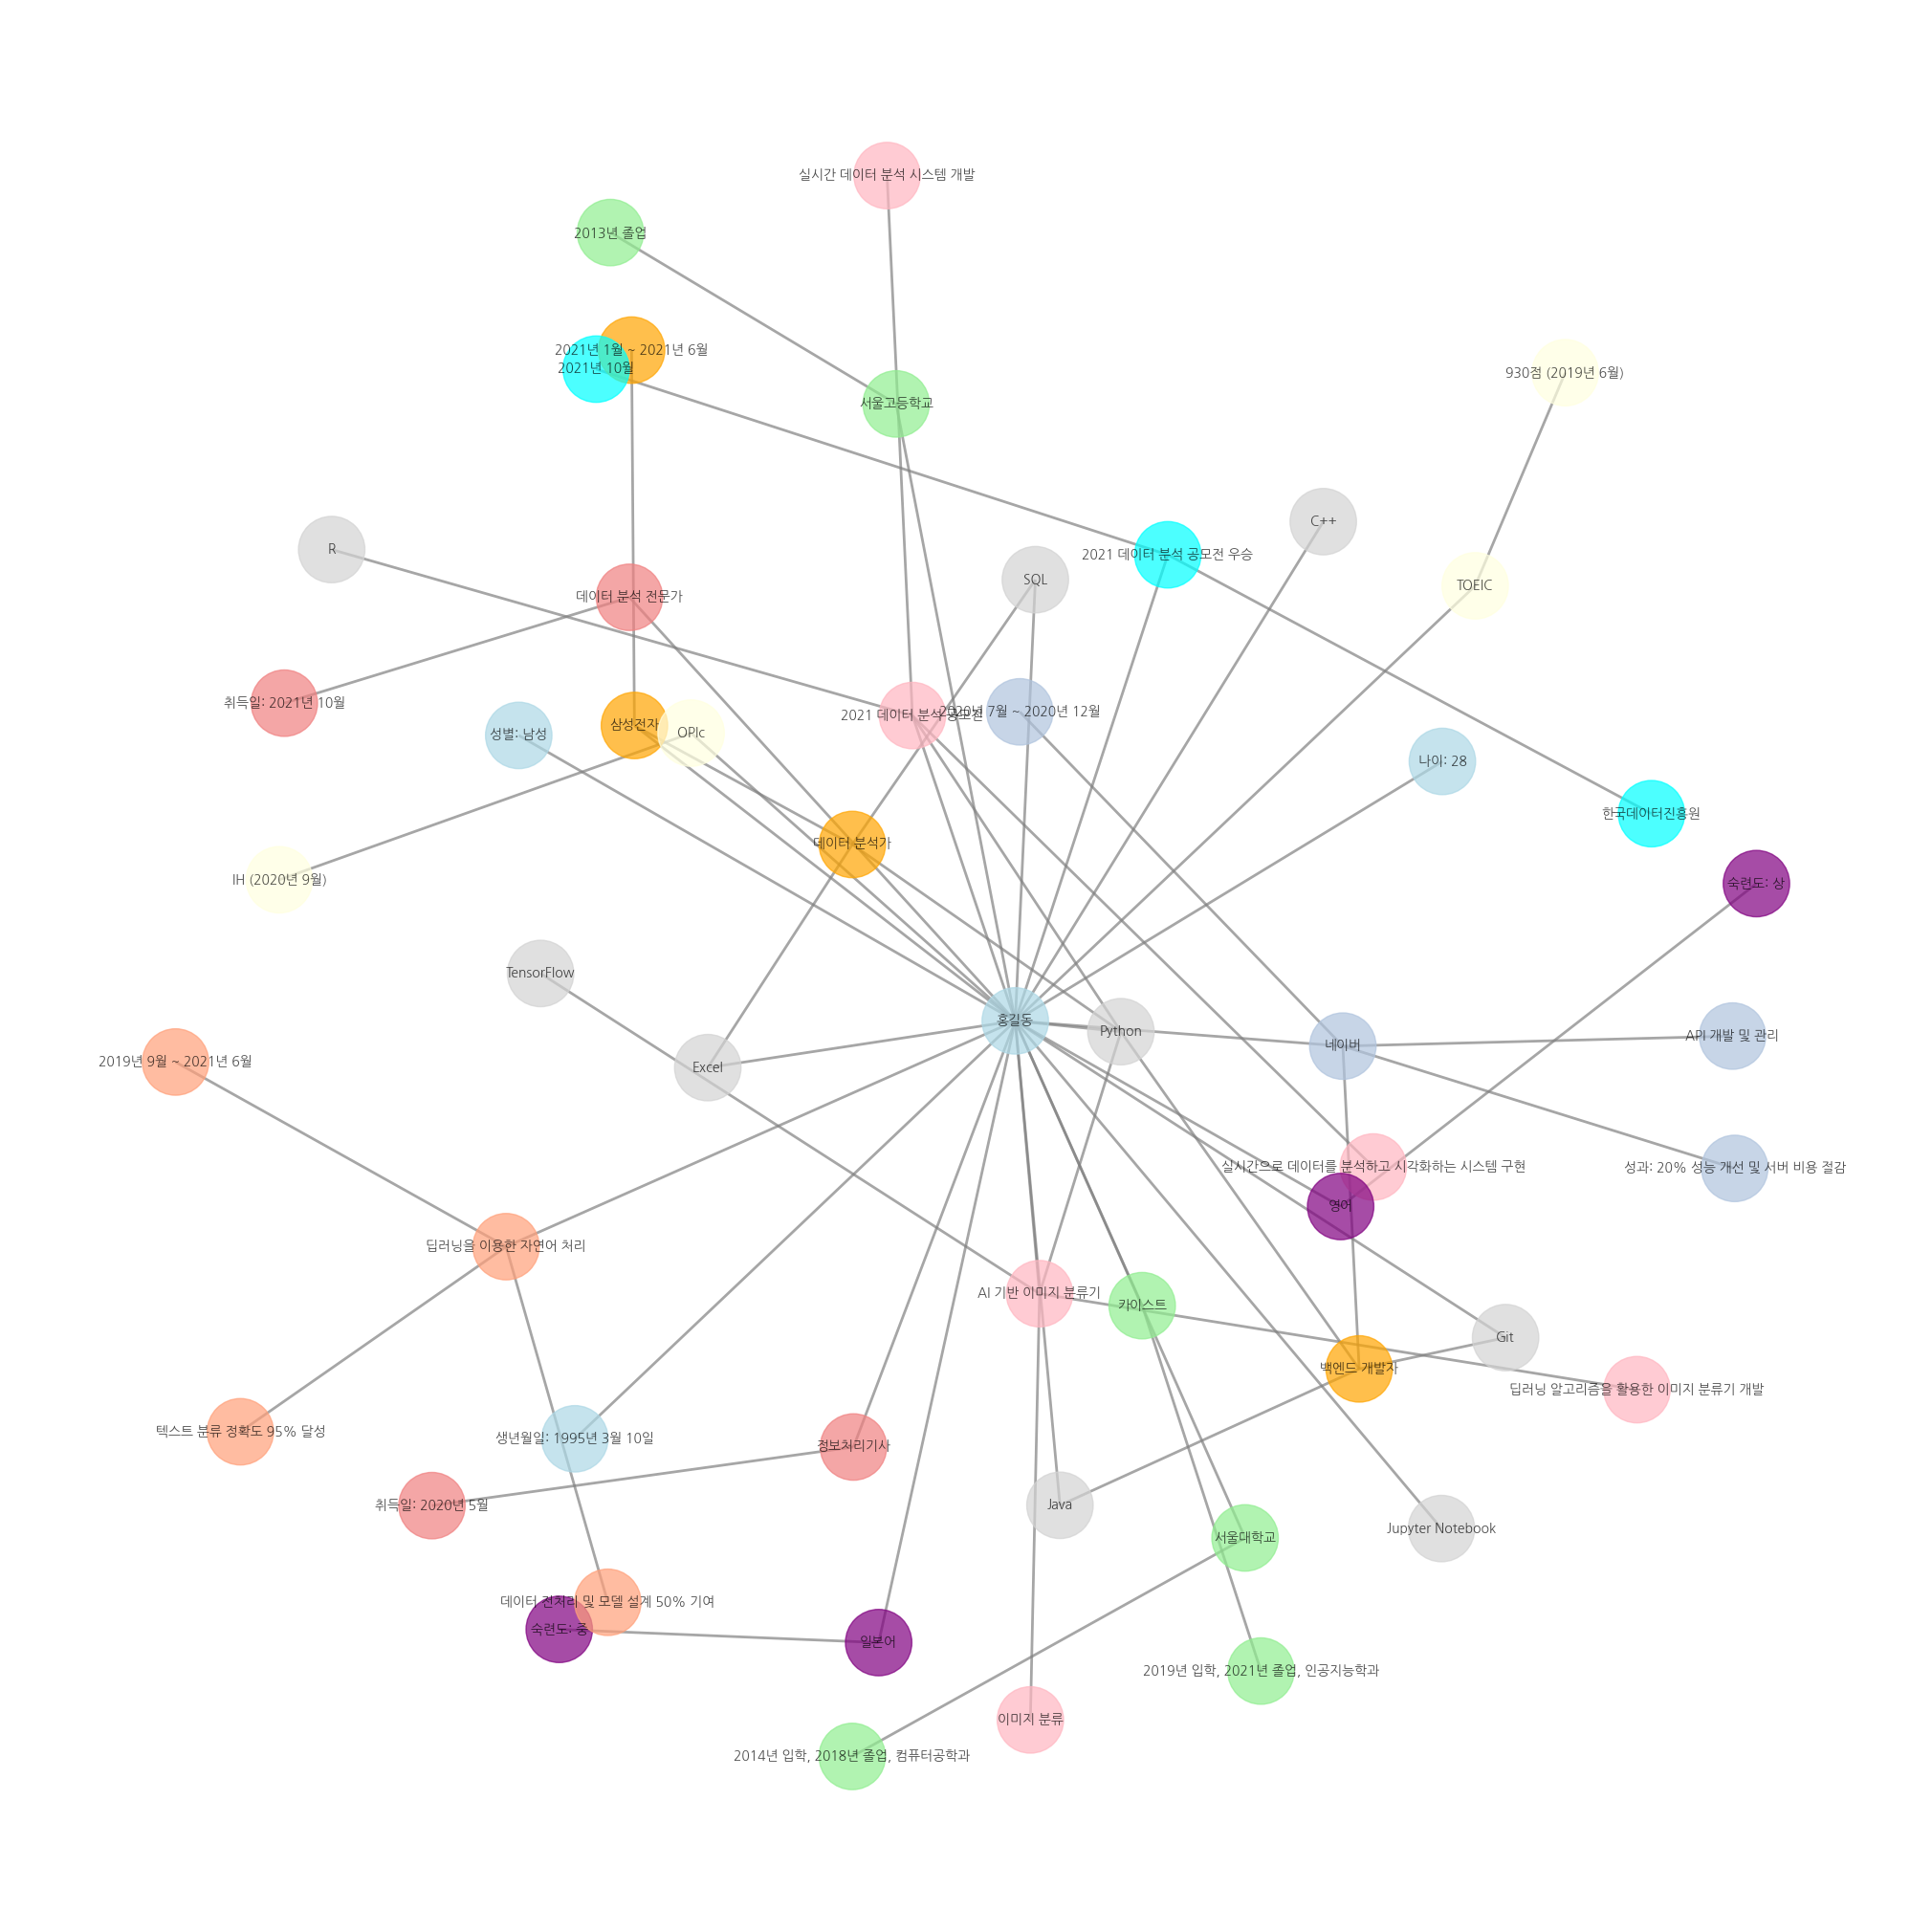

In [10]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm

# 나눔고딕 폰트 경로 설정 (Windows 시스템 기준)
font_path = "C:/Windows/Fonts/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 그래프 시각화
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, k=0.7, seed=42)

# 노드 타입에 따른 색상 정의
node_colors = {
    'personal_info': 'lightblue',
    'education': 'lightgreen',
    'education_detail': 'lightgreen',
    'certification': 'lightcoral',
    'certification_date': 'lightcoral',
    'internship': 'orange',
    'role': 'orange',
    'internship_duration': 'orange',
    'language_score': 'lightyellow',
    'language_score_detail': 'lightyellow',
    'project': 'lightpink',
    'project_subject': 'lightpink',
    'project_content': 'lightpink',
    'skill': 'lightgray',
    'language': 'purple',
    'language_proficiency': 'purple',
    'award': 'cyan',
    'award_institution': 'cyan',
    'award_date': 'cyan',
    'work_experience': 'lightsteelblue',
    'work_task': 'lightsteelblue',
    'work_duration': 'lightsteelblue',
    'work_achievement': 'lightsteelblue',
    'research': 'lightsalmon',
    'research_outcome': 'lightsalmon',
    'research_duration': 'lightsalmon',
    'research_contribution': 'lightsalmon'
}

# 각 노드의 타입에 맞는 색상 적용
color_map = [node_colors[G.nodes[node]['type']] for node in G]

# 그래프 그리기
nx.draw(G, pos, with_labels=True, node_color=color_map, font_size=10, node_size=2500, edge_color="gray", width=2, alpha=0.7, font_family=fontprop.get_name())

plt.show()

Shell Layout 알고리즘

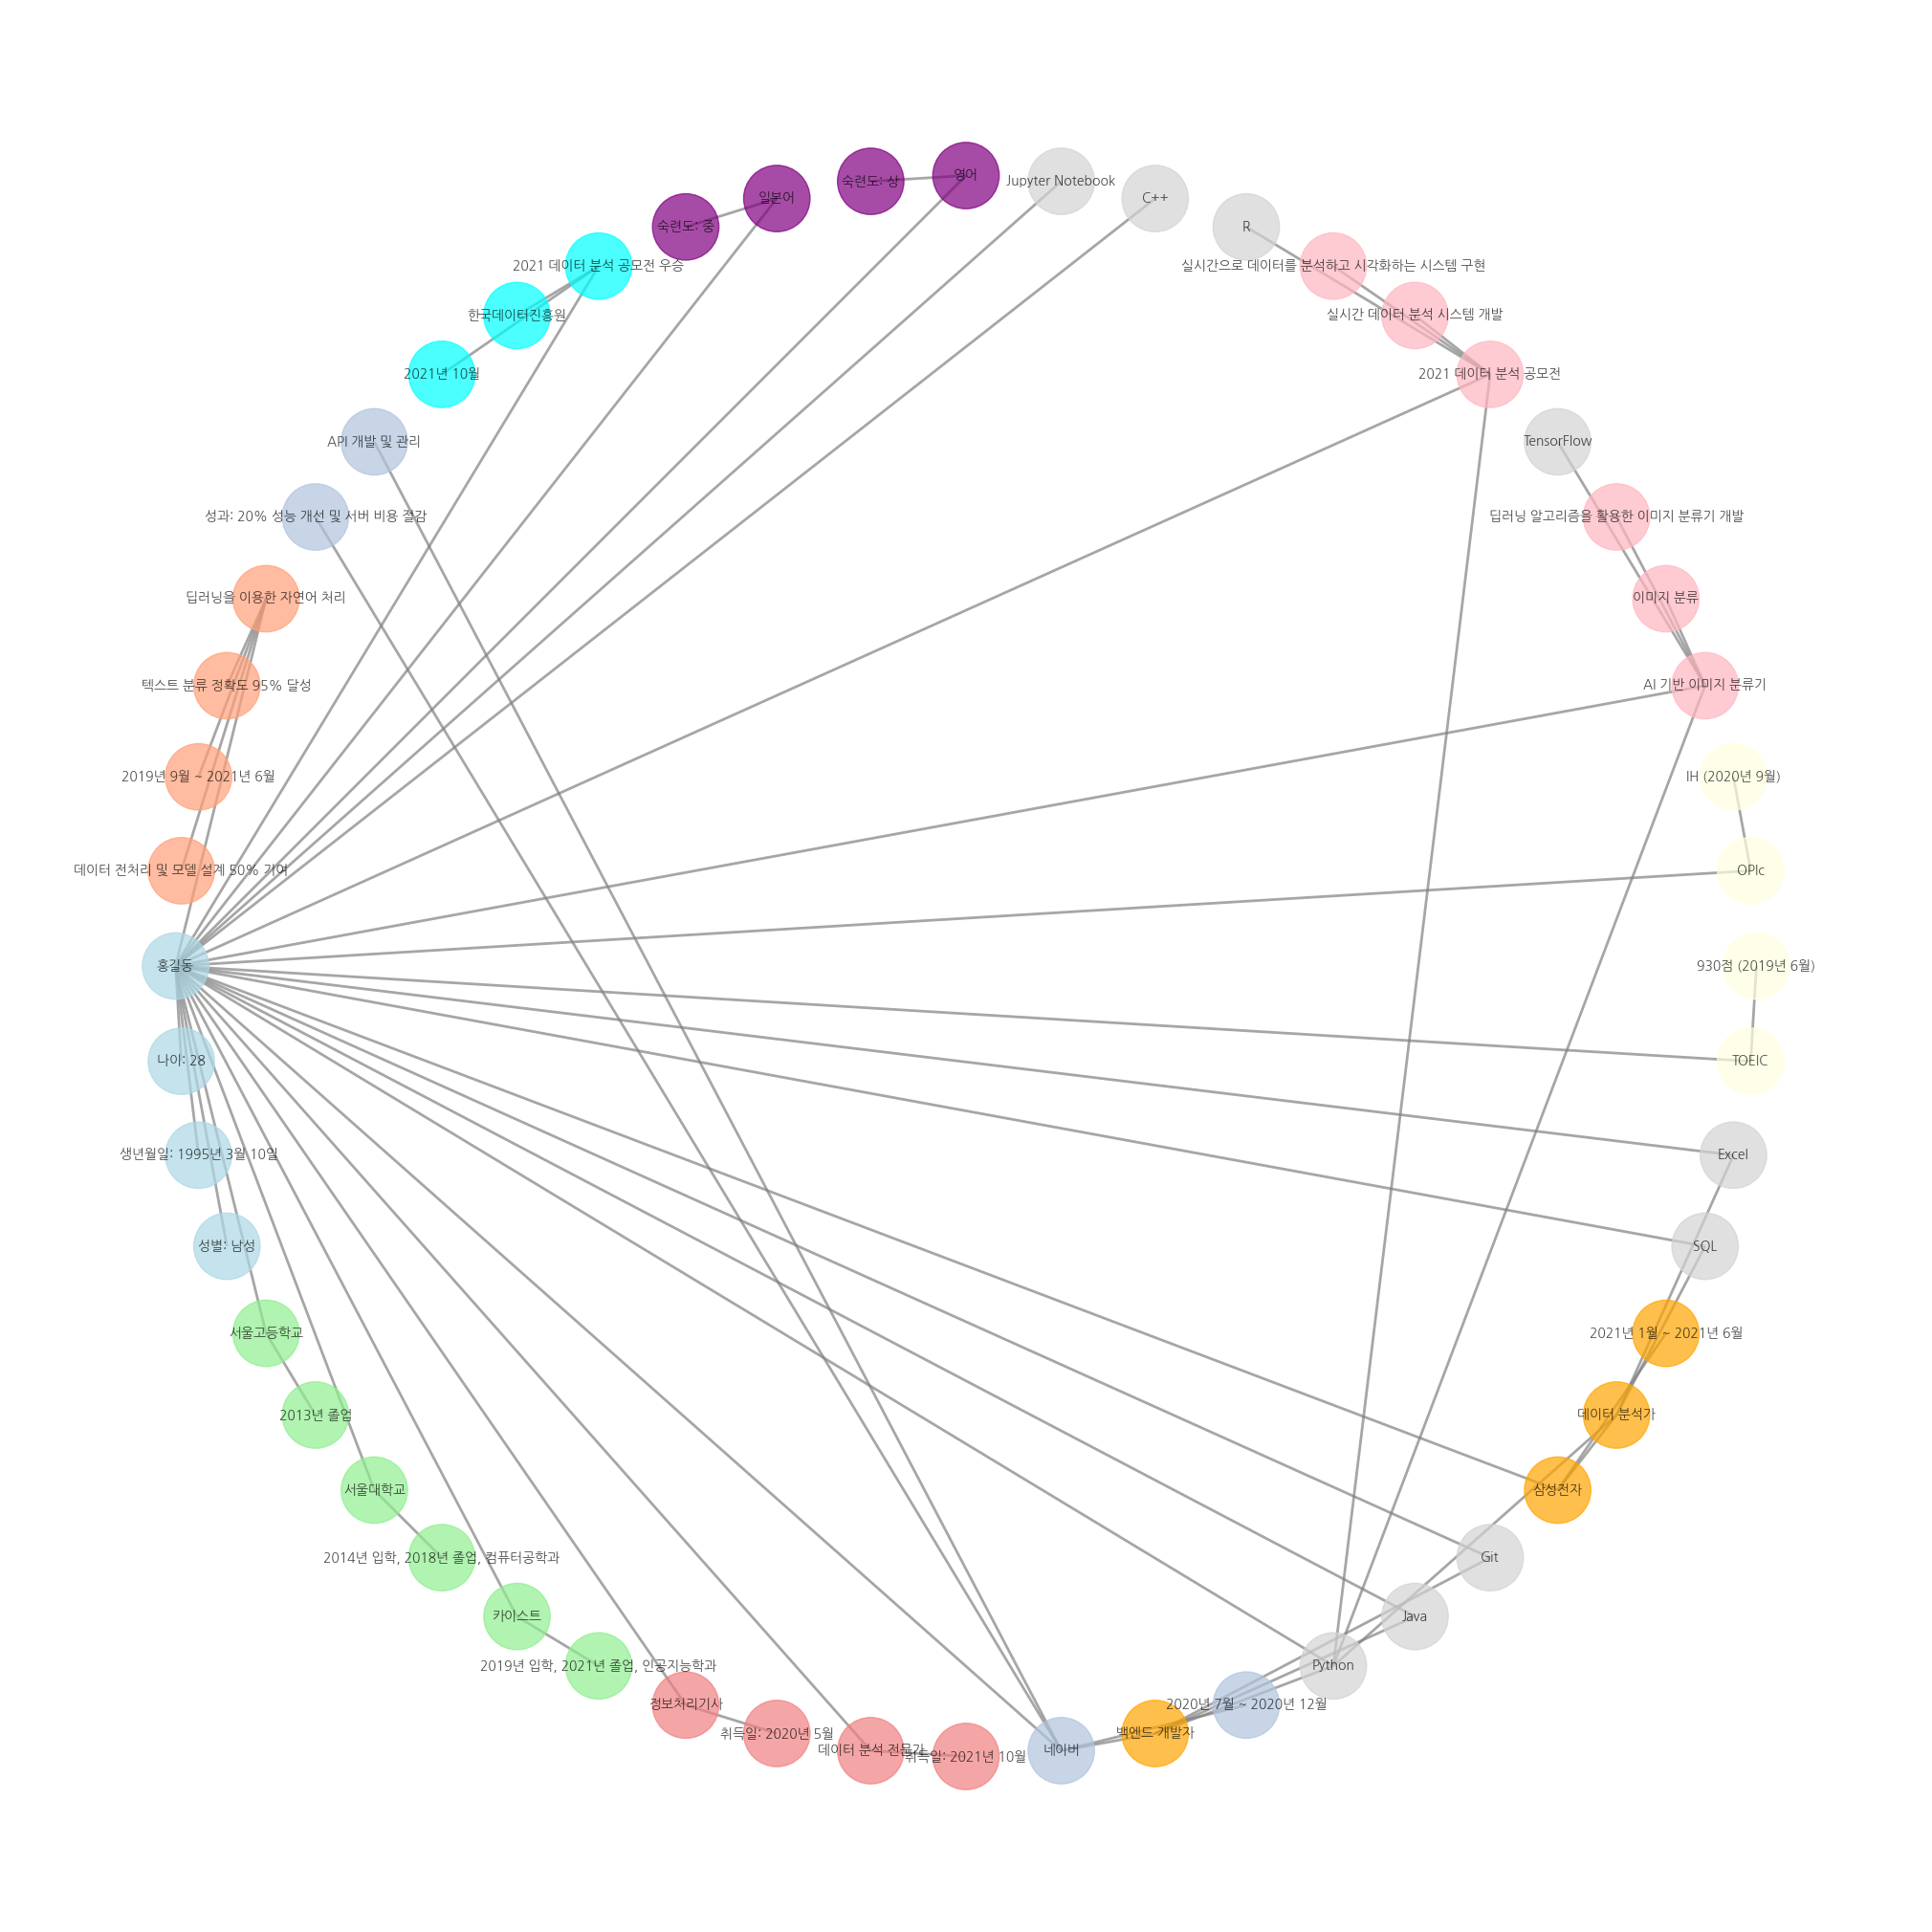

In [11]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm

# 나눔고딕 폰트 경로 설정 (Windows 시스템 기준)
font_path = "C:/Windows/Fonts/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 그래프 시각화
plt.figure(figsize=(20, 20))
pos = nx.shell_layout(G)  # Shell Layout 사용

# 노드 타입에 따른 색상 정의
node_colors = {
    'personal_info': 'lightblue',
    'education': 'lightgreen',
    'education_detail': 'lightgreen',
    'certification': 'lightcoral',
    'certification_date': 'lightcoral',
    'internship': 'orange',
    'role': 'orange',
    'internship_duration': 'orange',
    'language_score': 'lightyellow',
    'language_score_detail': 'lightyellow',
    'project': 'lightpink',
    'project_subject': 'lightpink',
    'project_content': 'lightpink',
    'skill': 'lightgray',
    'language': 'purple',
    'language_proficiency': 'purple',
    'award': 'cyan',
    'award_institution': 'cyan',
    'award_date': 'cyan',
    'work_experience': 'lightsteelblue',
    'work_task': 'lightsteelblue',
    'work_duration': 'lightsteelblue',
    'work_achievement': 'lightsteelblue',
    'research': 'lightsalmon',
    'research_outcome': 'lightsalmon',
    'research_duration': 'lightsalmon',
    'research_contribution': 'lightsalmon'
}

# 각 노드의 타입에 맞는 색상 적용
color_map = [node_colors[G.nodes[node]['type']] for node in G]

# 그래프 그리기
nx.draw(G, pos, with_labels=True, node_color=color_map, font_size=10, node_size=2500, edge_color="gray", width=2, alpha=0.7, font_family=fontprop.get_name())

plt.show()

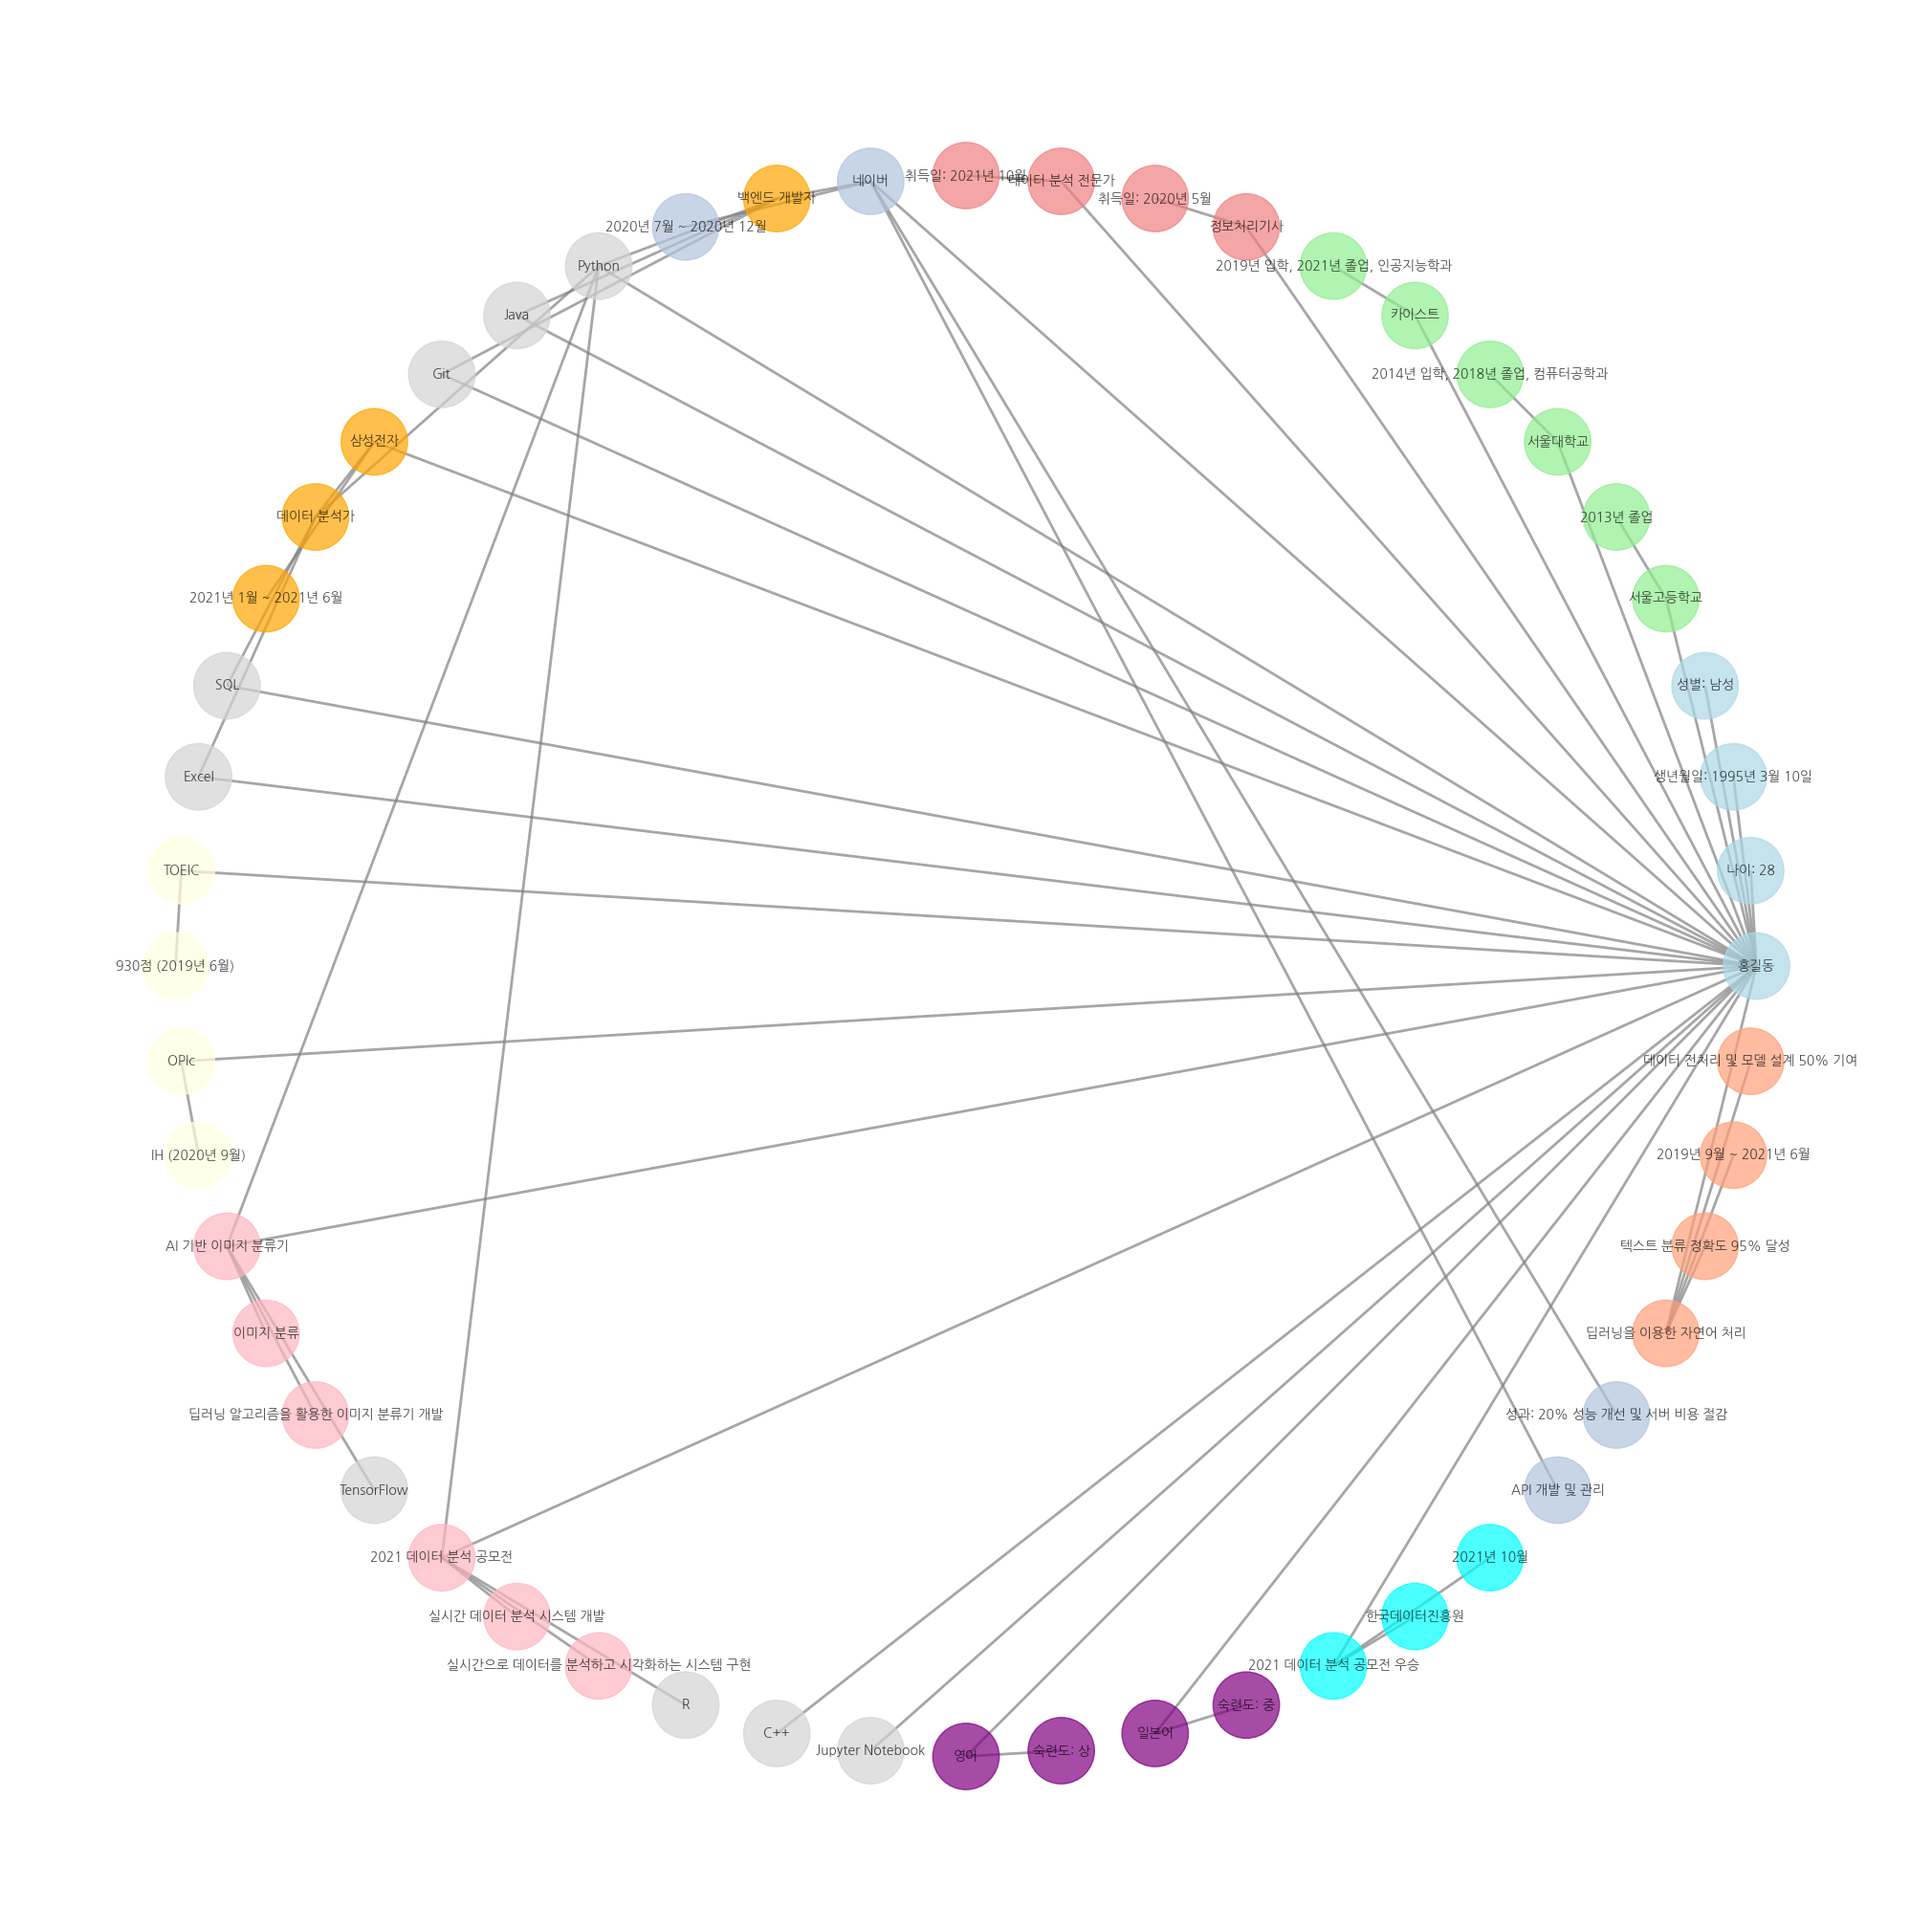

In [12]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm

# 나눔고딕 폰트 경로 설정 (Windows 시스템 기준)
font_path = "C:/Windows/Fonts/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 그래프 시각화
plt.figure(figsize=(20, 20))
pos = nx.circular_layout(G)  # Circular Layout 사용

# 노드 타입에 따른 색상 정의
node_colors = {
    'personal_info': 'lightblue',
    'education': 'lightgreen',
    'education_detail': 'lightgreen',
    'certification': 'lightcoral',
    'certification_date': 'lightcoral',
    'internship': 'orange',
    'role': 'orange',
    'internship_duration': 'orange',
    'language_score': 'lightyellow',
    'language_score_detail': 'lightyellow',
    'project': 'lightpink',
    'project_subject': 'lightpink',
    'project_content': 'lightpink',
    'skill': 'lightgray',
    'language': 'purple',
    'language_proficiency': 'purple',
    'award': 'cyan',
    'award_institution': 'cyan',
    'award_date': 'cyan',
    'work_experience': 'lightsteelblue',
    'work_task': 'lightsteelblue',
    'work_duration': 'lightsteelblue',
    'work_achievement': 'lightsteelblue',
    'research': 'lightsalmon',
    'research_outcome': 'lightsalmon',
    'research_duration': 'lightsalmon',
    'research_contribution': 'lightsalmon'
}

# 각 노드의 타입에 맞는 색상 적용
color_map = [node_colors[G.nodes[node]['type']] for node in G]

# 그래프 그리기
nx.draw(G, pos, with_labels=True, node_color=color_map, font_size=10, node_size=2500, edge_color="gray", width=2, alpha=0.7, font_family=fontprop.get_name())

plt.show()

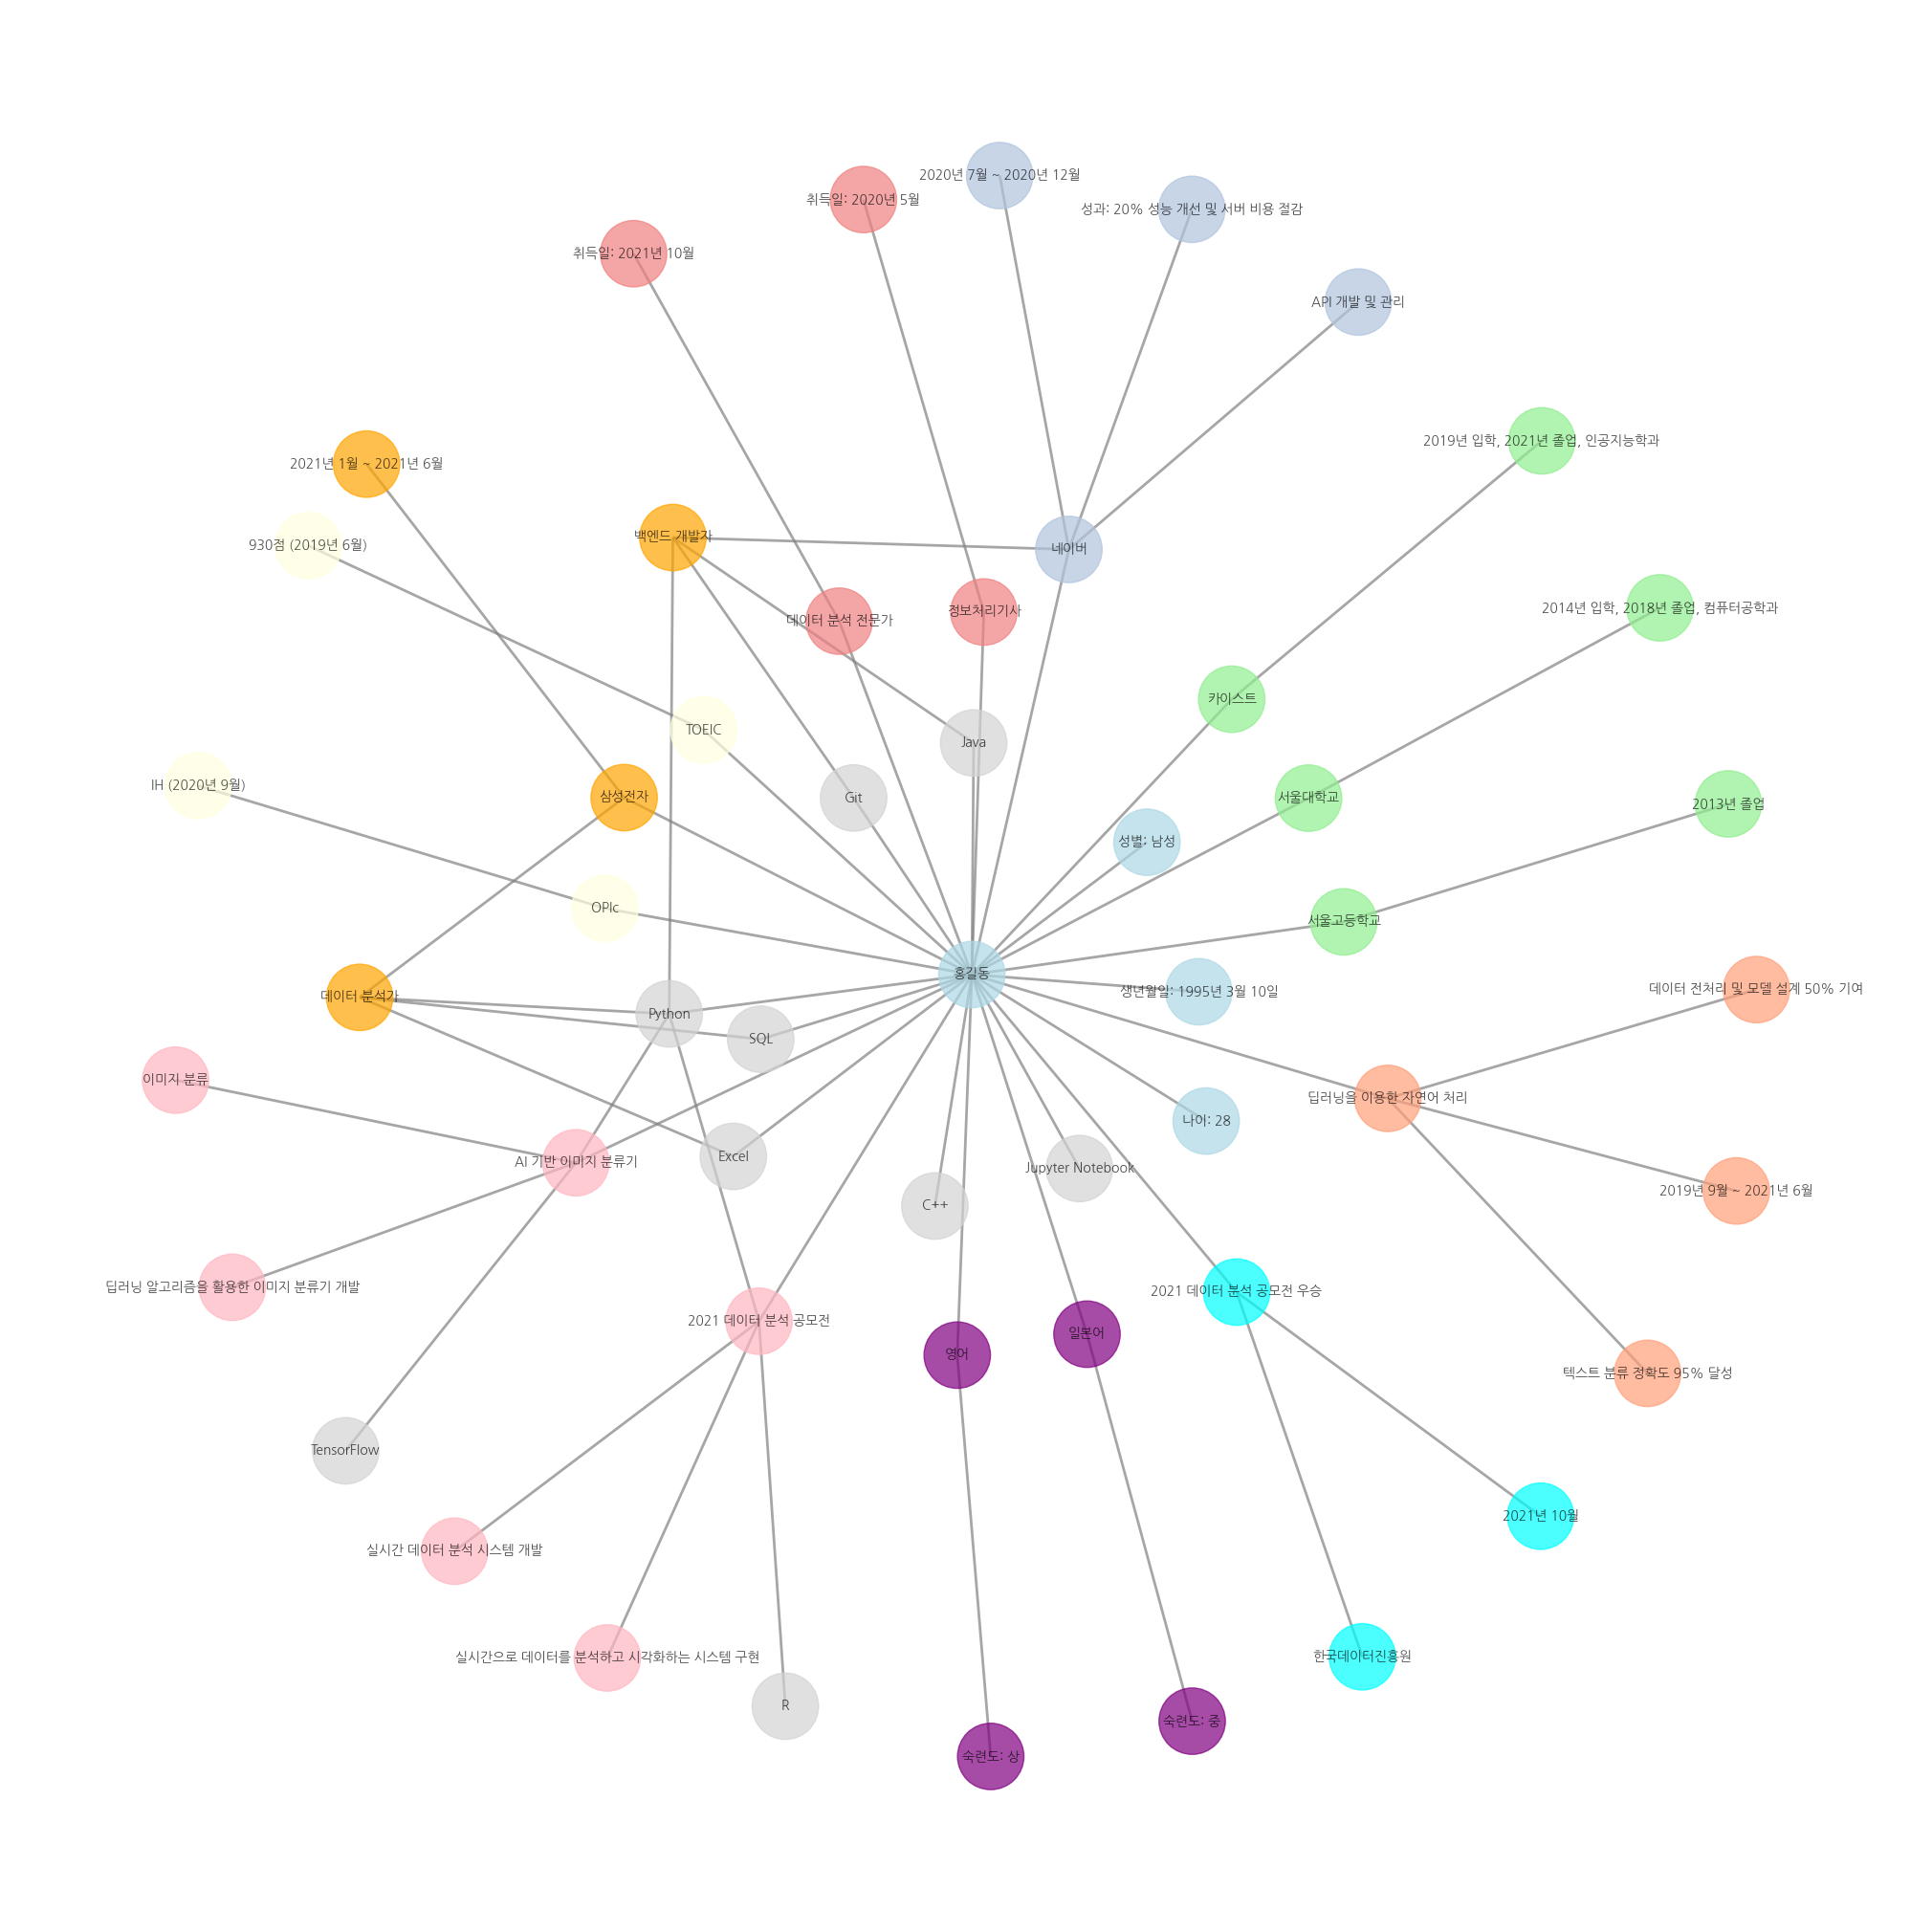

In [14]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm

# 나눔고딕 폰트 경로 설정 (Windows 시스템 기준)
font_path = "C:/Windows/Fonts/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 그래프 시각화
plt.figure(figsize=(20, 20))
pos = nx.kamada_kawai_layout(G)  # Kamada-Kawai Layout 사용

# 노드 타입에 따른 색상 정의
node_colors = {
    'personal_info': 'lightblue',
    'education': 'lightgreen',
    'education_detail': 'lightgreen',
    'certification': 'lightcoral',
    'certification_date': 'lightcoral',
    'internship': 'orange',
    'role': 'orange',
    'internship_duration': 'orange',
    'language_score': 'lightyellow',
    'language_score_detail': 'lightyellow',
    'project': 'lightpink',
    'project_subject': 'lightpink',
    'project_content': 'lightpink',
    'skill': 'lightgray',
    'language': 'purple',
    'language_proficiency': 'purple',
    'award': 'cyan',
    'award_institution': 'cyan',
    'award_date': 'cyan',
    'work_experience': 'lightsteelblue',
    'work_task': 'lightsteelblue',
    'work_duration': 'lightsteelblue',
    'work_achievement': 'lightsteelblue',
    'research': 'lightsalmon',
    'research_outcome': 'lightsalmon',
    'research_duration': 'lightsalmon',
    'research_contribution': 'lightsalmon'
}

# 각 노드의 타입에 맞는 색상 적용
color_map = [node_colors[G.nodes[node]['type']] for node in G]

# 그래프 그리기
nx.draw(G, pos, with_labels=True, node_color=color_map, font_size=10, node_size=2500, edge_color="gray", width=2, alpha=0.7, font_family=fontprop.get_name())

plt.show()

In [9]:
# import pandas as pd
# import networkx as nx
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm

# # 폰트 경로를 확인하고 설정합니다. 맑은 고딕 경로가 맞는지 다시 한 번 확인하세요.
# font_path = 'C:/Windows/Fonts/malgun.ttf'  # 이 경로가 맞지 않으면, 확인한 경로로 수정
# font_name = fm.FontProperties(fname=font_path).get_name()
# plt.rc('font', family=font_name)

# # 마이너스 기호 깨짐 방지
# plt.rcParams['axes.unicode_minus'] = False

# # CSV 파일 읽기
# file_path = 'C:/Users/정호원/OneDrive/바탕 화면/금융 프로젝트/데이터/원티드_채용공고_마케팅.csv'
# data = pd.read_csv(file_path)

# # 그래프 초기화
# G = nx.Graph()

# # 샘플로 몇 개의 노드만 추가해 보기 (너무 많으면 복잡하므로 필터링)
# # 예시로 5개의 채용 공고만 사용
# sample_data = data.head(5)  # 상위 5개의 채용 공고만 사용

# # 샘플로 사용할 스킬, 산업군, 프로젝트
# skill_keywords = ["마케팅", "콘텐츠", "광고", "디지털", "SNS"]
# industries = ["패션", "마케팅", "광고"]
# projects = ["캠페인", "프로젝트"]

# # 채용 공고에서 스킬, 프로젝트, 산업군 추출 및 연결
# for index, row in sample_data.iterrows():
#     job = row['채용공고명']
#     duties = row['주요 업무'] if pd.notnull(row['주요 업무']) else ""
#     requirements = row['자격 요건'] if pd.notnull(row['자격 요건']) else ""
#     position_detail = row['포지션 상세'] if pd.notnull(row['포지션 상세']) else ""
    
#     # 스킬 연결
#     for keyword in skill_keywords:
#         if keyword in duties or requirements:
#             G.add_node(keyword, label="Skill")
#             G.add_edge(job, keyword)
    
#     # 산업군 연결
#     for industry in industries:
#         if industry in position_detail:
#             G.add_node(industry, label="Industry")
#             G.add_edge(job, industry)
    
#     # 프로젝트 연결
#     for project in projects:
#         if project in position_detail:
#             G.add_node(project, label="Project")
#             G.add_edge(job, project)

# # 레이아웃 설정 (노드 간 간격을 넓게 설정)
# pos = nx.spring_layout(G, k=0.8, seed=42)  # k 값을 높이면 노드 간의 간격이 커짐

# # 그래프 스타일 조정
# plt.figure(figsize=(14, 12))  # 그래프 크기 조정
# nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=2500, alpha=0.9)  # 노드 크기와 색상
# nx.draw_networkx_edges(G, pos, edge_color="gray", width=1.5, alpha=0.7)  # 엣지(선) 스타일
# nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold", font_color="black")  # 레이블 설정

# # 그래프 제목
# plt.title("Hyunjeong Kim 이력서와 채용 공고 매칭 그래프", fontsize=18)

# # 여백 설정
# plt.tight_layout()
# plt.show()
